# An intro to using causalinfo

## Setup

We need to import the library, and a few other useful things for displaying the graphs.

In [6]:
from import_helper import *
from causalinfo import *

In [7]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

## Creating Variables & Distributions

Let's begin by creating an example of Arnaud's. We start by creating some variables. They each have a name, and a number of states. All our variables have 2 states, 0 and 1. We'll treat this like False and True.

Notes:
* We can have any number of discrete states, we just using 2
* I'm using the convention of naming the python variables the same as our causal `Variable`s.

In [8]:
s = Variable('S', 2)
a = Variable('A', 2)
b = Variable('B', 2)

Variables represent probabilities in `causalinfo`. Rather than assigning them a particular value, we generate a `Distribution` over one or more variables. The easiest way to do this is using a `UniformDist`.

In [9]:
ds = UniformDist(s)
ds

,Pr
S,
0,0.5
1,0.5


In [10]:
dsa = UniformDist(s, a)
dsa

Pr 
 
 
 S 
 A 
 
 
 
 
 
 0 
 0 
 0.25 
 
 
 1 
 0.25 
 
 
 1 
 0 
 0.25 
 
 
 1 
 0.25

In [11]:
dsa2 = JointDist({s: [.2, .8], a: [.4, .6]})
dsa2

Pr 
 
 
 S 
 A 
 
 
 
 
 
 0 
 0 
 0.08 
 
 
 1 
 0.12 
 
 
 1 
 0 
 0.32 
 
 
 1 
 0.48

## Creating Equations

We can now relate these variables using equations. I've defined some common `mappings` that you can use (you can also create your own mappings --- a topic for later).

In [13]:
same_eq = Equation('SAME', [s], [a], equations.f_same)
xnor_eq = Equation('XNOR', [s, a], [b], equations.f_xnor)

We can also examine these equations to see what mappings they give...

In [14]:
same_eq

SAME 
 
 
 Output 
 A 
 
 
 State 
 0 
 1 
 
 
 S 
 
 
 
 
 
 
 0 
 1 
 0 
 
 
 1 
 0 
 1

In [15]:
xnor_eq

XNOR 
 
 
 
 Output 
 B 
 
 
 
 State 
 0 
 1 
 
 
 S 
 A 
 
 
 
 
 
 
 0 
 0 
 0 
 1 
 
 
 1 
 1 
 0 
 
 
 1 
 0 
 1 
 0 
 
 
 1 
 0 
 1

## Creating Causal Graphs

We can now put these equations together to form causal networks.

In [16]:
net = CausalGraph([same_eq, xnor_eq])

We can also look at these (if you have the right things installed... more later).

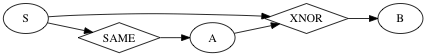

In [20]:
draw(net.full_network)

## Generating Joint Distributions

These networks can now be used to generate joint distributions over all the variables. (Note that we prune all zero probability events)

In [22]:
m = MeasureCause(net, UniformDist(s))
j = net.generate_joint(m.root_dist)
j

,,,Pr
S,A,B,
0,0,1,0.5
1,1,1,0.5


We can look at the joint distribution of just some of those variables...

In [26]:
j.joint(a, b)

,,Pr
A,B,
0,1,0.5
1,1,0.5


...and we can calculate the mutual information, and conditional mutual information

In [27]:
j.mutual_info(a, b)

0.0

In [28]:
j.mutual_info(a, b, s)

0.0

## Interventions

We can also intervene on this graph. We'll need to assign a distribution to the variable if we want to do this.

We then generate a new joint distribution, with the interventions...

In [37]:
j_do = net.generate_joint(m.root_dist,
                          do_dist=UniformDist(a))

In [38]:
j_do.mutual_info(a, b)

0.0

In [39]:
j_do.mutual_info(a, b, s)

1.0

Note the last calculation is *not* the same as above (it was 0.0). That is because the joint distribution is different under interventions, as we can see...

In [40]:
j_do

Pr 
 
 
 S 
 A 
 B 
 
 
 
 
 
 0 
 0 
 1 
 0.25 
 
 
 1 
 0 
 0.25 
 
 
 1 
 0 
 0 
 0.25 
 
 
 1 
 1 
 0.25